In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen

from tqdm import tqdm

import warnings

In [7]:
N = 30
N_INTVS = 5
N_EXPERIMENTS = 10
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

In [12]:
PS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

pof_pop = [[] for _ in PS]

for p_id, p in enumerate(PS):
    print(p)
    
    matrix_generator = matrix_gen.MatrixGenerator(
        np.random.binomial, (1, p), N, N_INTVS
    )
    
    success_count = 0
    while success_count < N_EXPERIMENTS:
        (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
            round_=False
        )
        
        # Efficient
        eff_assigner = assignment.AssignmentHelperV2(
            sorted_increase_matrix, CAPACITIES
        )
        eff_assignments = eff_assigner.ip_solve()
        eff_cost = eff_assigner.get_cost(
            eff_assignments, cost_matrix=sorted_matrix
        )

        # Leximin
        lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
            sorted_increase_matrix, CAPACITIES
        )
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            lex_assignments = lex_assigner.solve()
        lex_cost = eff_assigner.get_cost(
            lex_assignments, cost_matrix=sorted_matrix
        )
        
        # print(sorted_increase_matrix)
        # print(eff_assignments)
        # print(lex_assignments)
        # print(eff_cost, lex_cost)
        
        if lex_cost == eff_cost == 0:
            pof_pop[p_id].append(1)
        else:
            pof_pop[p_id].append(lex_cost / eff_cost)
        success_count += 1

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


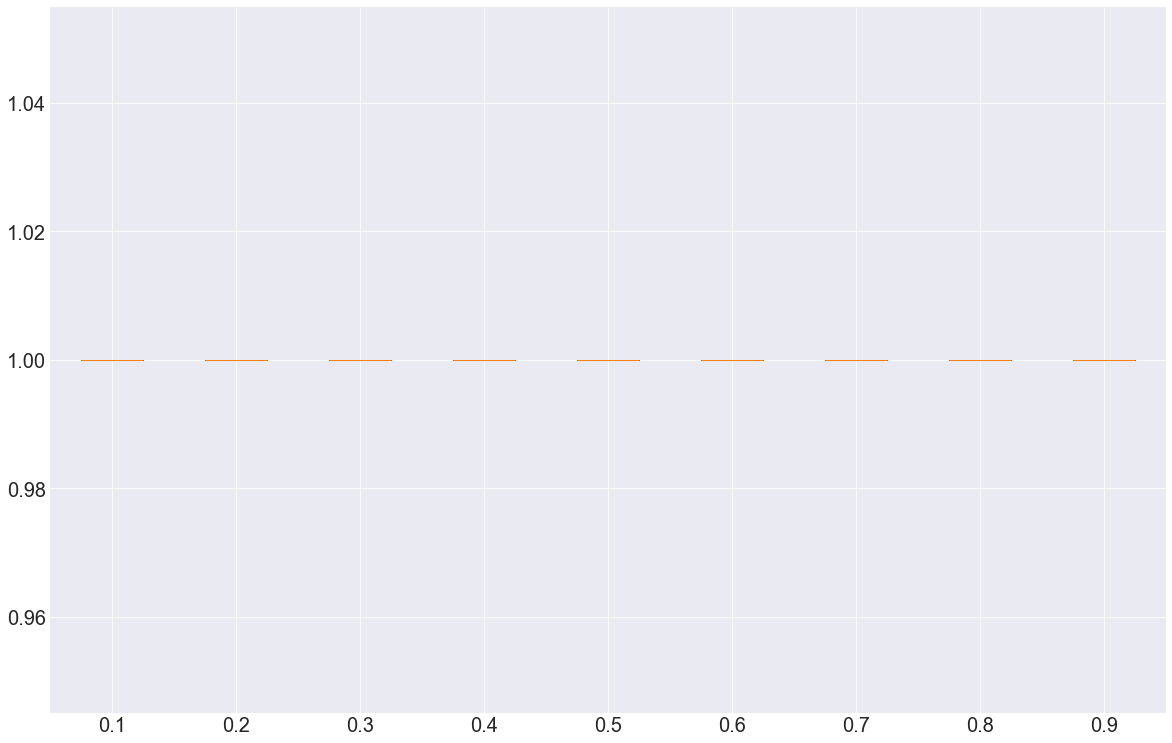

In [13]:
plt.boxplot(
    pof_pop,
    labels=PS
)
plt.show()